# Linear Regression Tut 1  
Mục tiêu:   
* Học cách gọi thư viện  
* Học cách đọc dữ liệu và xử lý dữ liệu với Pandas  
* Học cách thể hiện dữ liệu  
* Sử dụng bộ thư viện scikit-learn cho Linear regression  

Bước 1: Gọi thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  #Doc file bang du lieu 

Bước 2. Đọc và kiểm tra dữ liệu  
Ở đây, dữ liệu được đọc bởi bộ thư viện Pandas, kiểu dữ liệu là <b><u> dataframe</u></b> (bảng)  

In [2]:
data_read = pd.read_csv('./Data/data_for_lr.csv')

./ trong biểu diễn đường dẫn thể hiện là thư mục hiện tại  
Bước 3. Kiểm tra dữ liệu.  
dataframe.head(n): Thể hiện n hàng đầu tiên để biết về bảng

In [3]:
data_read.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


dataframe.infor(): Tóm tắt thông tin về dữ liệu.

In [4]:
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


dataframe.describe() : Tóm tắt các thông tin thống kê về bộ dữ liệu  

In [5]:
data_read.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


Bước 4: Chuẩn hoá dữ liệu.  
Chuẩn hoá dữ liệu. X phải đi kèm y. X không có y, hoặc ngược lại thì loại bỏ.  
Method dataframe.dropna() giúp làm điều này (trong đó: dataframe là tên biến chứa bảng dữ liệu). 

In [6]:
data_read = data_read.dropna()

In [7]:
data_read.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


Bước 5 (Optional): Chuyển dữ liệu từ dataframe sang numpy array để xử lý. 

In [8]:
data = data_read.to_numpy() # Chuyển dũ liệu từ dara kiểu numpy

In [9]:
data.shape

(699, 2)

Kiểm tra quan hệ giữa các features lẫn nhau và features - lables

In [10]:
x = data[:,0]
y = data[:,1]

Text(0, 0.5, 'y')

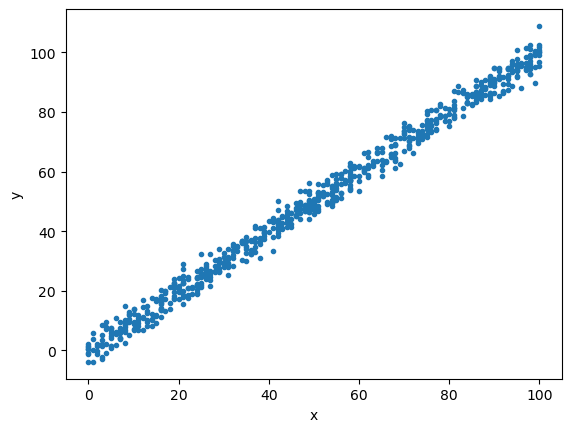

In [11]:
plt.plot(x,y,'.')
plt.xlabel('x')
plt.ylabel('y')

Chú ý: Việc vẽ đồ thị có thể thực hiện trực tiếp trên dữ liệu bảng dataframe bởi method:  
dataframe.plot(). Trong đó dataframe là tên biến chứa dữ liệu

c:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='x', ylabel='y'>

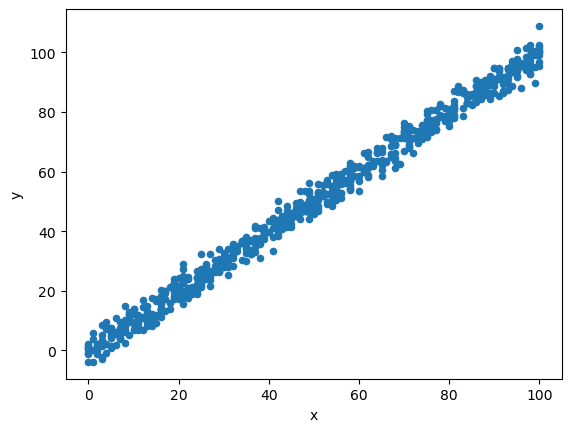

In [39]:
data_read.plot(0,1,'scatter')

Kết luận: X, y có thể có quan hệ tuyến tính.

Bước 6:
Dùng thư viện scikit learn để mô hình hoá và fit mô hình  
Vì ta muốn dùng hàm hồi quy tuyến tính (Linear Regression) nên gọi thư viên vào  
Vì ta muốn trộn dữ liệu nên gọi thư viện này vào

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [13]:
x = x.reshape(-1,1)
x_train, x_test = train_test_split(x,test_size=0.2,random_state=4)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=4)

Chú ý: Cỡ của x khi đưa vào train phải chỉ rõ số features. Nếu x chỉ có 1 feature, thường python sẽ để cỡ mặc định là (n,) trong đó n là số hàng.  
Cỡ này không thể dùng để train được.  
Khi đó, ta phải reshape(-1,1)

In [14]:
print(x_test.shape)
print(x_train.shape)

(140, 1)
(559, 1)


6.2. Fit model

In [15]:
model = LinearRegression()
model.fit(X=x_train,y=y_train)

LinearRegression()

lấy các thông số đã fit xong

In [16]:
weight = model.coef_
bias = model.intercept_

Kiểm tra các kết quả

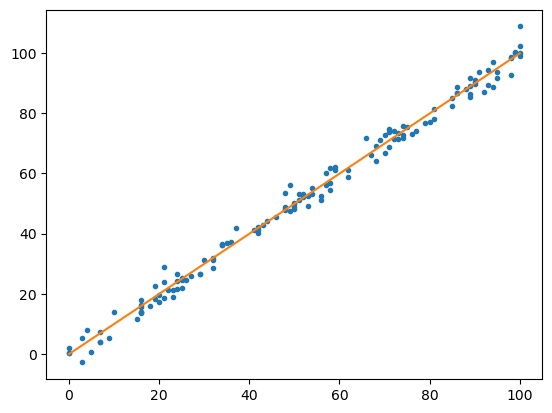

In [17]:
test_point = np.linspace(0,100,100)
plt.plot(x_test,y_test,'.')
plt.plot(test_point, test_point*weight + bias)
plt.show()

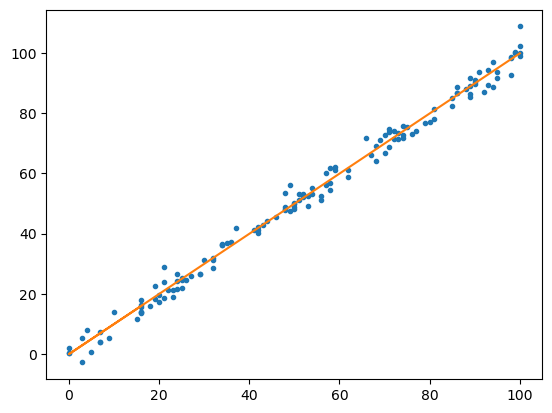

In [29]:
plt.plot(x_test,y_test,'.')
plt.plot(x_test, x_test*weight + bias) # x_test * weight + bias -> y_hat 
plt.show()

Đối với các mô hình khác, dùng predict

In [18]:
model.predict(x_test) # y_hat, du doan 

array([ 9.99519258e+01, -6.26713931e-02,  4.93805847e+00,  4.09433135e+01,
        5.69456490e+01,  9.49511959e+01,  8.49497362e+01,  3.39422917e+01,
        5.79457950e+01,  5.19449191e+01,  5.59455030e+01,  3.39422917e+01,
        1.89401021e+01,  7.89488604e+01,  3.19419997e+01,  3.19419997e+01,
        7.39481305e+01,  6.19463789e+01,  6.93835041e+00,  8.99504661e+01,
        2.49409779e+01,  2.93776652e+00,  4.19434594e+01,  4.79443353e+01,
        8.89503201e+01,  2.99417078e+01,  4.19434594e+01,  9.19507580e+01,
        8.09491523e+01,  8.99504661e+01,  1.99402480e+01,  4.99446272e+01,
        7.29479846e+01,  5.79457950e+01,  9.89517798e+01,  8.89503201e+01,
        4.99446272e+01,  9.09506121e+01,  3.93791249e+00,  6.99475466e+01,
       -6.26713931e-02,  5.89459410e+01,  5.89459410e+01,  5.09447732e+01,
        2.09403940e+01,  9.99519258e+01,  5.09447732e+01,  6.93835041e+00,
        5.29450651e+01,  8.49497362e+01,  6.99475466e+01,  8.93864235e+00,
        9.79516339e+01,  